In [37]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/UNIR/lab3/wine')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importamos los datos:

In [38]:
df = pd.read_csv('dataset_unir.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Realizamos una exploración inicial:

Vemos qué valores faltan:

In [39]:
missing_values_count = df.isna().sum()
missing_values_count

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


No hay valores faltantes.

Vemos si los tipos de datos son correctos:

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Todas las variables se refiferen a valores numéricos y están correctamente definidas como numéricas.
La variable "quality" tiene un significado categórico ya que define grupos en los que está clasificando el vino -> La cambiamos a categórica:

In [41]:
df['quality']=df['quality'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   category
 12  wine_type             6497 non-null   object  
dtypes: category(1), float64(11), object(1)
memory usage: 615.9+ KB


Veamos un resumen estadístico de cada una de las variables:

In [42]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


### Visualización de datos

Vamos a utilizar seaborn para visualizar boxplots con los datos de cada variable para observar su distribución y detectar valores atípicos:

In [43]:
import seaborn as sns

<Axes: xlabel='fixed acidity'>

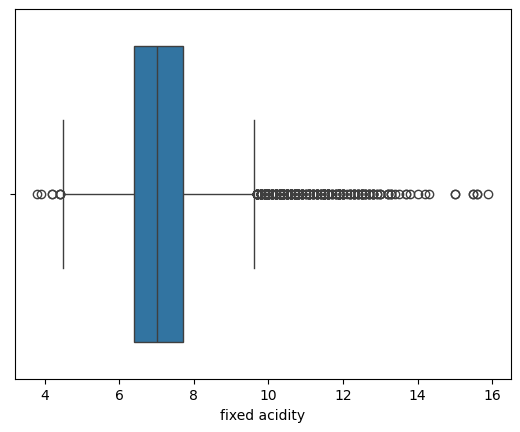

In [44]:
sns.boxplot(x=df["fixed acidity"], flierprops=dict(marker='o', color='red', markersize=6))


<Axes: xlabel='volatile acidity'>

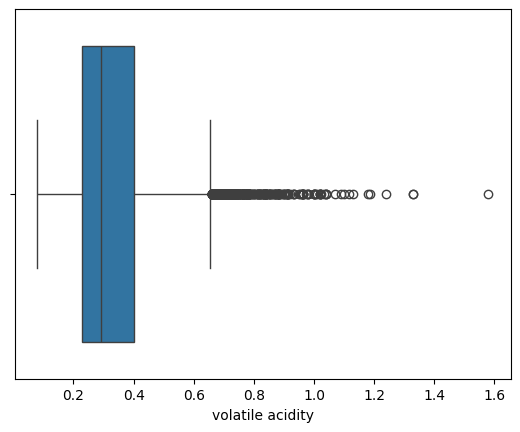

In [45]:
sns.boxplot(x=df["volatile acidity"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='citric acid'>

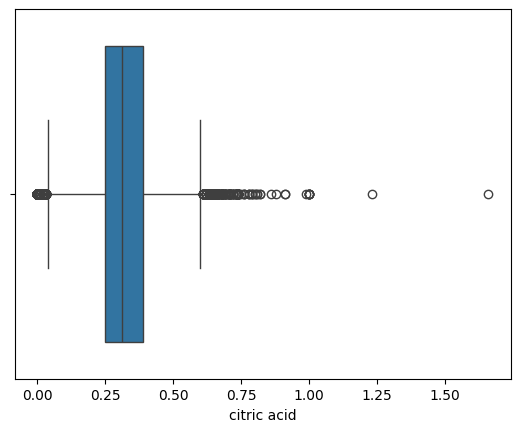

In [46]:
sns.boxplot(x=df["citric acid"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='residual sugar'>

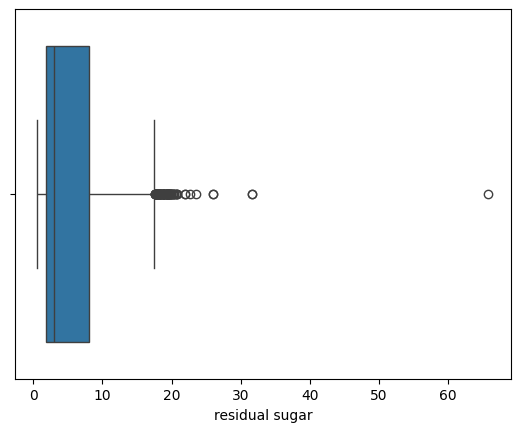

In [47]:
sns.boxplot(x=df["residual sugar"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='chlorides'>

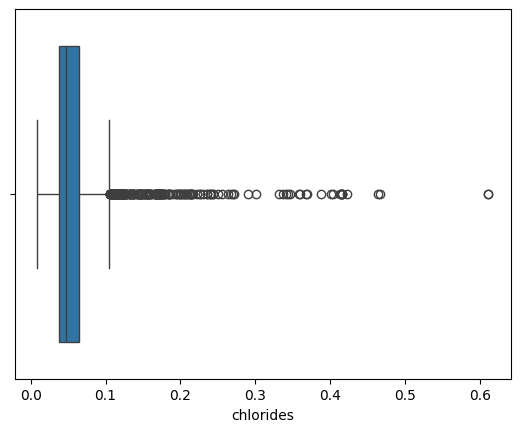

In [48]:
sns.boxplot(x=df["chlorides"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='free sulfur dioxide'>

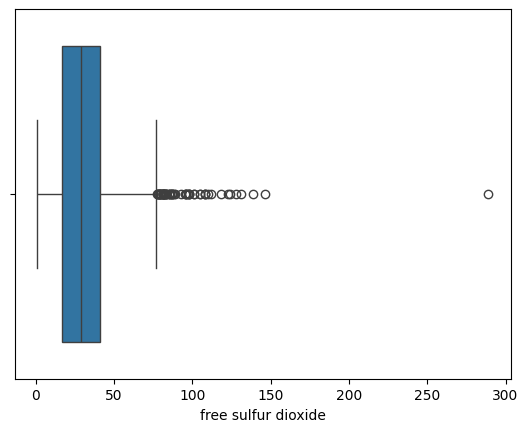

In [49]:
sns.boxplot(x=df["free sulfur dioxide"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='total sulfur dioxide'>

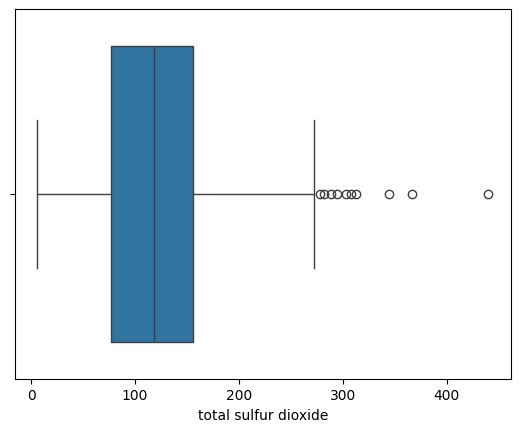

In [50]:
sns.boxplot(x=df["total sulfur dioxide"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='density'>

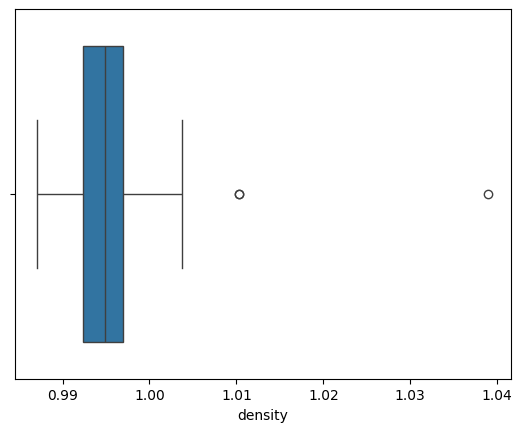

In [51]:
sns.boxplot(x=df["density"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='pH'>

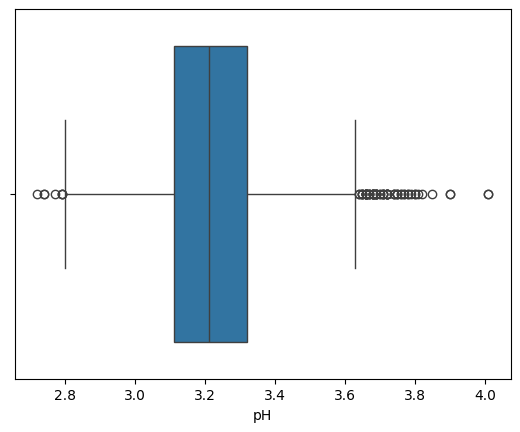

In [52]:
sns.boxplot(x=df["pH"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='sulphates'>

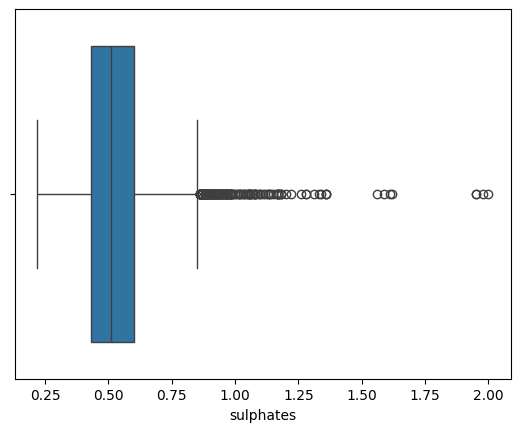

In [53]:
sns.boxplot(x=df["sulphates"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='alcohol'>

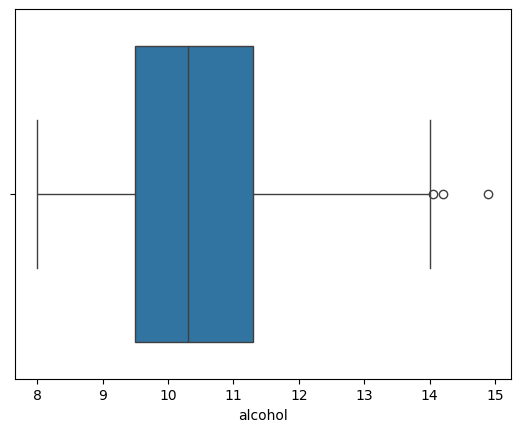

In [54]:
sns.boxplot(x=df["alcohol"], flierprops=dict(marker='o', color='red', markersize=6))

### Detección de valores anómalos

In [55]:
for var in df.columns[:-2]:
  q1 = df[var].quantile(0.25)
  q3 = df[var].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q1 + 1.5 * iqr
  val_atipicos = list(df[var][(df[var] < lower_bound) | (df[var] > upper_bound)])
  print("El rango intercuartílico para la variable ", var, " es: ", round(iqr, 2))
  print("El límite inferior es: ", lower_bound)
  print("El límite superior es: ", upper_bound)
  print("Los valores detectados como atípicos son", len(val_atipicos), ": ", val_atipicos)

El rango intercuartílico para la variable  fixed acidity  es:  1.3
El límite inferior es:  4.450000000000001
El límite superior es:  8.35
Los valores detectados como atípicos son 867 :  [11.2, 8.9, 8.9, 8.5, 8.9, 8.5, 8.8, 8.7, 8.8, 8.6, 10.2, 8.8, 9.3, 9.7, 8.8, 8.8, 8.6, 9.3, 8.6, 8.6, 8.4, 8.4, 10.1, 9.4, 8.8, 8.8, 9.0, 8.4, 8.4, 9.2, 8.8, 8.8, 8.9, 8.9, 11.5, 9.6, 8.8, 12.8, 12.8, 11.0, 9.7, 11.6, 8.7, 8.6, 8.4, 8.9, 9.0, 8.5, 8.9, 12.0, 15.0, 15.0, 10.8, 11.1, 9.4, 10.0, 12.5, 11.8, 11.5, 11.5, 10.9, 8.4, 11.5, 10.3, 8.9, 11.4, 8.9, 9.9, 9.9, 12.0, 8.7, 11.6, 8.7, 11.0, 10.4, 13.3, 10.8, 10.6, 11.1, 8.4, 10.3, 10.3, 10.3, 10.3, 9.0, 8.6, 9.6, 9.6, 9.8, 9.6, 9.8, 9.3, 10.3, 10.0, 10.0, 11.6, 10.3, 13.4, 10.7, 10.2, 10.2, 8.4, 11.9, 8.9, 12.4, 12.5, 12.2, 10.6, 10.9, 10.9, 11.9, 13.8, 9.6, 9.1, 10.7, 9.1, 13.5, 11.5, 10.5, 11.9, 12.6, 8.6, 11.9, 12.5, 12.8, 10.0, 12.8, 10.4, 10.3, 9.4, 9.1, 14.0, 11.5, 11.5, 9.4, 11.4, 13.7, 9.6, 13.7, 9.5, 8.4, 12.7, 12.0, 11.5, 11.5, 8.7, 12.2, 11

### Corrección de valores anómalos

Vamos a sustituir los valores anómalos por encima del límite superior con el valor de ese límite y lo mismo con los valores por debajo del límite inferior:

In [56]:
for var in df.columns[:-2]:
  q1 = df[var].quantile(0.25)
  q3 = df[var].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q1 + 1.5 * iqr
  df[var] = df[var].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
  )


Vamos a volver a construir los boxplots para ver si ya no aparecen los valores anómalos:

<Axes: xlabel='fixed acidity'>

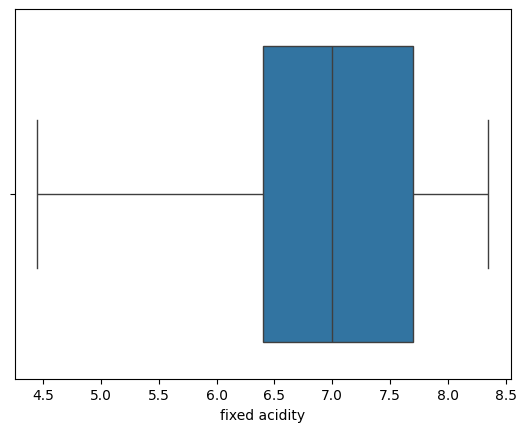

In [57]:
sns.boxplot(x=df["fixed acidity"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='volatile acidity'>

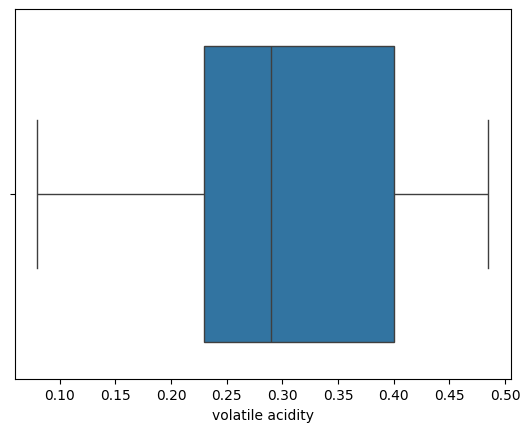

In [58]:
sns.boxplot(x=df["volatile acidity"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='citric acid'>

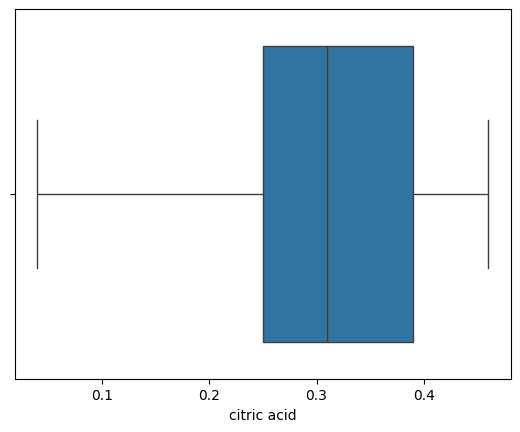

In [59]:
sns.boxplot(x=df["citric acid"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='residual sugar'>

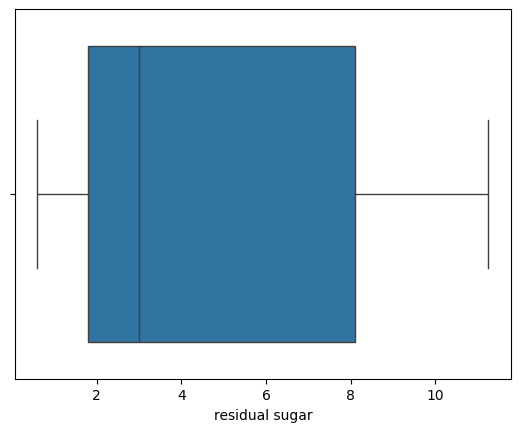

In [60]:
sns.boxplot(x=df["residual sugar"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='chlorides'>

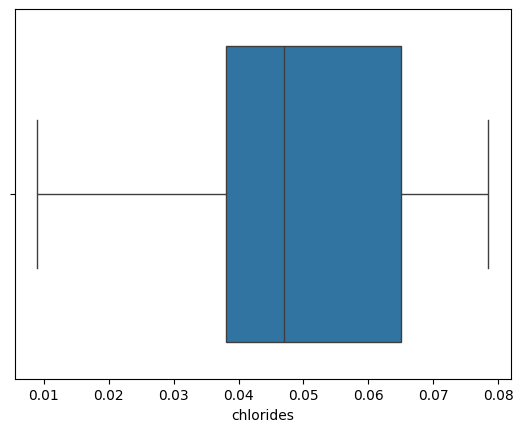

In [61]:
sns.boxplot(x=df["chlorides"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='free sulfur dioxide'>

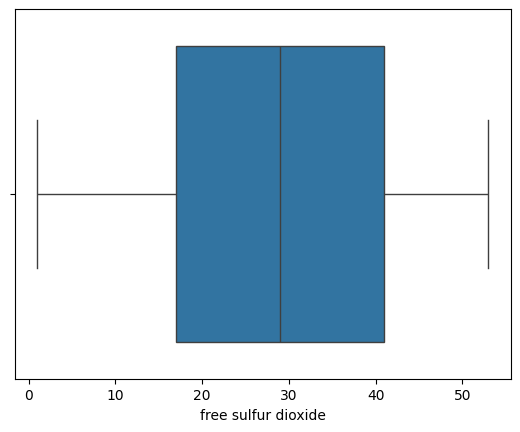

In [62]:
sns.boxplot(x=df["free sulfur dioxide"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='total sulfur dioxide'>

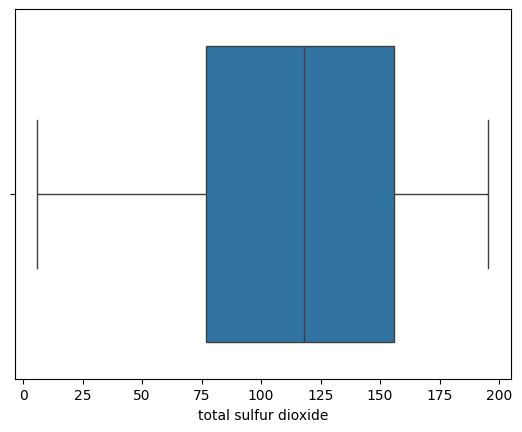

In [63]:
sns.boxplot(x=df["total sulfur dioxide"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='density'>

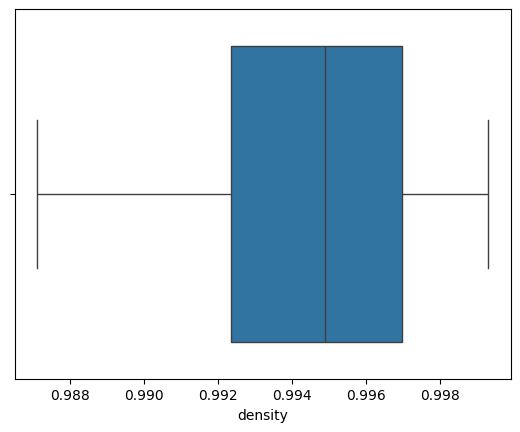

In [64]:
sns.boxplot(x=df["density"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='pH'>

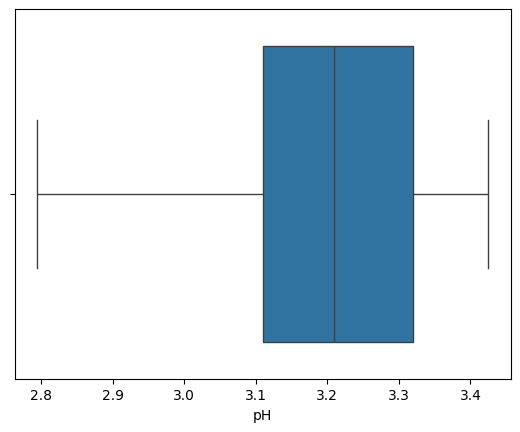

In [65]:
sns.boxplot(x=df["pH"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='sulphates'>

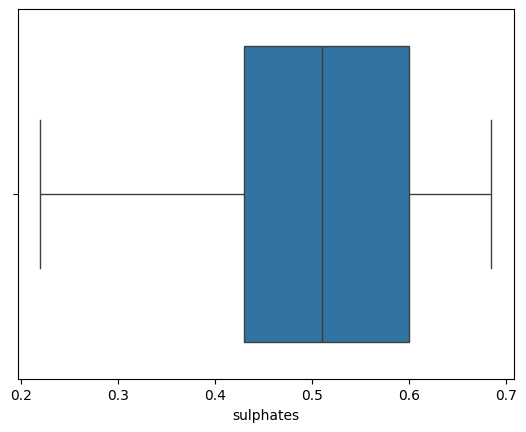

In [66]:
sns.boxplot(x=df["sulphates"], flierprops=dict(marker='o', color='red', markersize=6))

<Axes: xlabel='alcohol'>

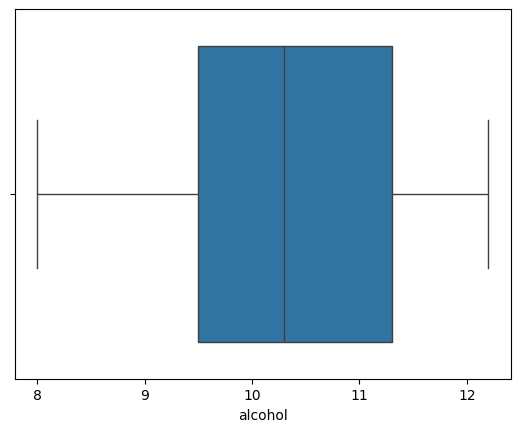

In [67]:
sns.boxplot(x=df["alcohol"], flierprops=dict(marker='o', color='red', markersize=6))

Podemos ver que ahora los boxplots no muestran la existencia de ningún valor atípico.

### Escalado de datos

Para cada variable, primero vamos a observar su distribución. Si sigue aproximadamente una distribución mormal, usaremos StandardScaler, y si no, escalaremos los datos usando MinMaxScaler:

(array([  25.,   99.,  181.,  524.,  587., 1139., 1174.,  908.,  603.,
        1257.]),
 array([4.45, 4.84, 5.23, 5.62, 6.01, 6.4 , 6.79, 7.18, 7.57, 7.96, 8.35]),
 <BarContainer object of 10 artists>)

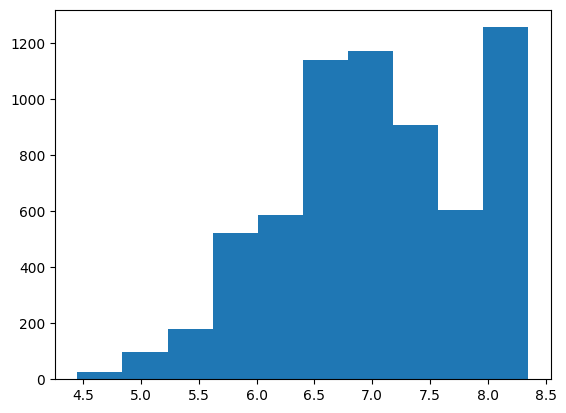

In [68]:
from matplotlib import pyplot as plt
plt.hist(df['fixed acidity'])

La distribución de fixed acidity es aproximadamente normal, así que la escalamos usando StandardScaler:

(array([  25.,   99.,  181.,  524.,  892.,  834., 1174.,  908.,  603.,
        1257.]),
 array([-3.01935533, -2.562979  , -2.10660266, -1.65022633, -1.19385   ,
        -0.73747366, -0.28109733,  0.175279  ,  0.63165533,  1.08803167,
         1.544408  ]),
 <BarContainer object of 10 artists>)

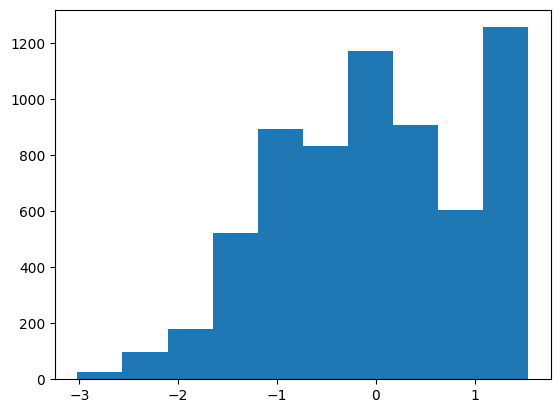

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df['fixed acidity'] = StandardScaler().fit_transform(df[['fixed acidity']])
plt.hist(df['fixed acidity'])

(array([  71.,  344.,  724.,  932., 1034.,  794.,  588.,  391.,  313.,
        1306.]),
 array([0.08  , 0.1205, 0.161 , 0.2015, 0.242 , 0.2825, 0.323 , 0.3635,
        0.404 , 0.4445, 0.485 ]),
 <BarContainer object of 10 artists>)

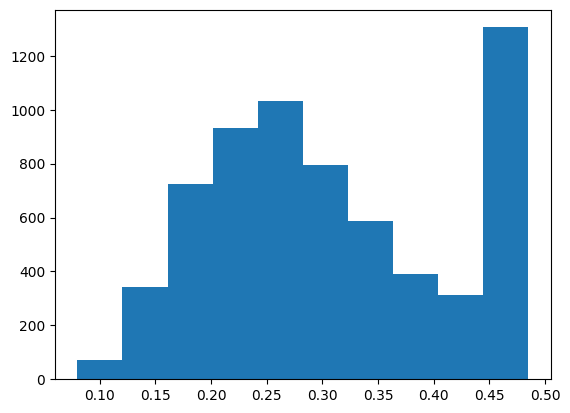

In [70]:
plt.hist(df['volatile acidity'])

La distribución de volatile acidity no es normal, así que la escalamos usando MinMaxScaler:

(array([  71.,  344.,  724.,  932., 1034.,  794.,  588.,  391.,  313.,
        1306.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

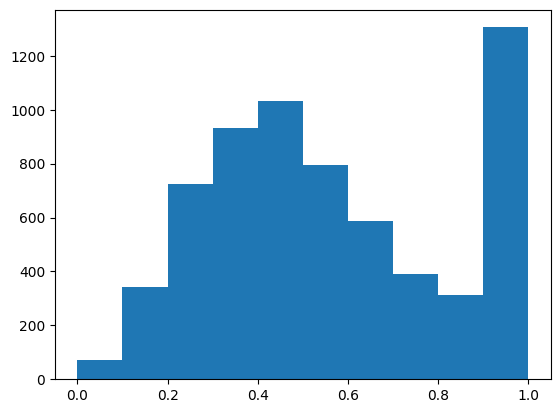

In [71]:
df['volatile acidity'] = MinMaxScaler().fit_transform(df[['volatile acidity']])
plt.hist(df['volatile acidity'])

(array([ 446.,  153.,  167.,  278.,  570., 1201., 1064.,  749.,  509.,
        1360.]),
 array([0.04 , 0.082, 0.124, 0.166, 0.208, 0.25 , 0.292, 0.334, 0.376,
        0.418, 0.46 ]),
 <BarContainer object of 10 artists>)

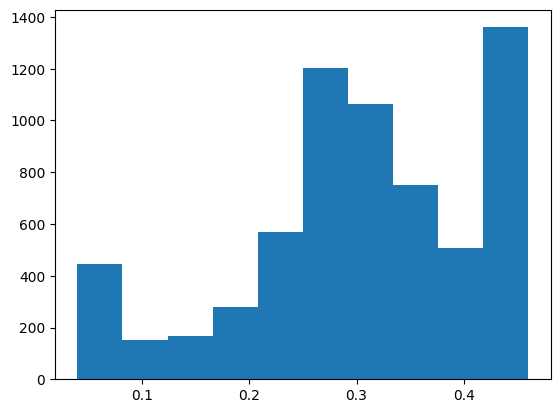

In [72]:
plt.hist(df['citric acid'])

La distribución de citric acid no es normal, así que la escalamos usando MinMaxScaler:

(array([ 446.,  153.,  167.,  278.,  733., 1038., 1064.,  749.,  509.,
        1360.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

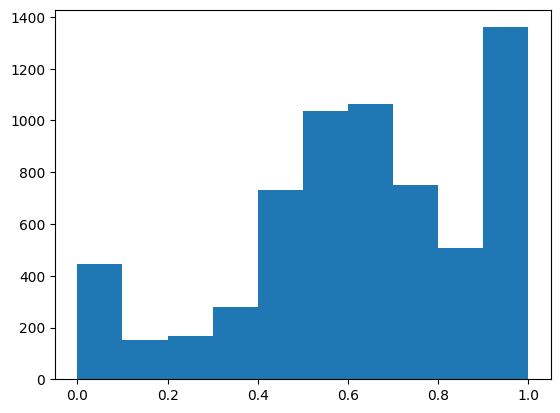

In [73]:
df['citric acid'] = MinMaxScaler().fit_transform(df[['citric acid']])
plt.hist(df['citric acid'])

(array([1298., 1792.,  393.,  363.,  322.,  313.,  373.,  283.,  173.,
        1187.]),
 array([ 0.6  ,  1.665,  2.73 ,  3.795,  4.86 ,  5.925,  6.99 ,  8.055,
         9.12 , 10.185, 11.25 ]),
 <BarContainer object of 10 artists>)

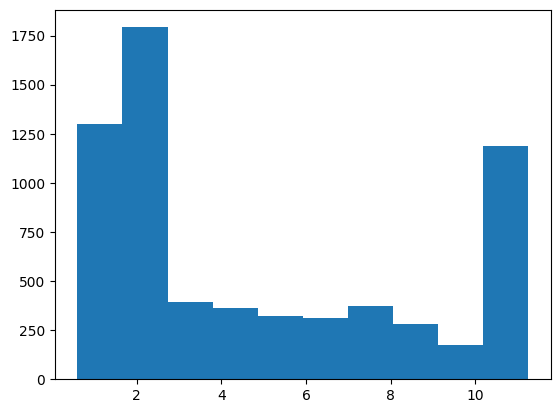

In [74]:
plt.hist(df['residual sugar'])

La distribución de residual sugar es aproximadamente normal, así que la escalamos usando StandardScaler:

(array([1298., 1792.,  393.,  363.,  322.,  313.,  373.,  283.,  173.,
        1187.]),
 array([-1.17169313, -0.88503623, -0.59837933, -0.31172243, -0.02506553,
         0.26159137,  0.54824828,  0.83490518,  1.12156208,  1.40821898,
         1.69487588]),
 <BarContainer object of 10 artists>)

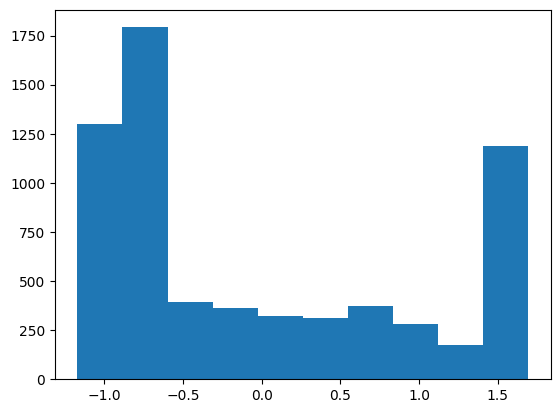

In [75]:
df['residual sugar'] = StandardScaler().fit_transform(df[['residual sugar']])
plt.hist(df['residual sugar'])

(array([  13.,   83.,  362.,  942., 1152., 1245.,  721.,  341.,  295.,
        1343.]),
 array([0.009  , 0.01595, 0.0229 , 0.02985, 0.0368 , 0.04375, 0.0507 ,
        0.05765, 0.0646 , 0.07155, 0.0785 ]),
 <BarContainer object of 10 artists>)

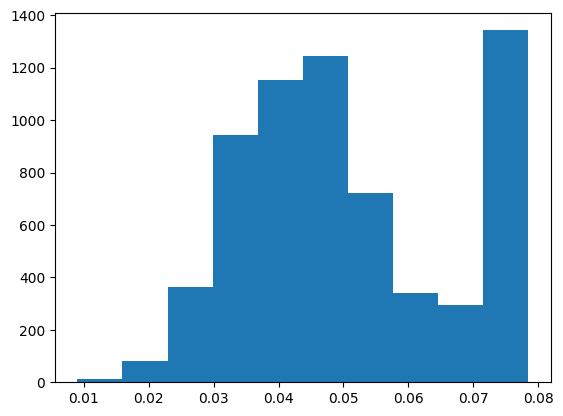

In [76]:
plt.hist(df['chlorides'])

La distribución de chlorides es aproximadamente normal, así que la escalamos usando StandardScaler:

(array([  13.,   83.,  362.,  942., 1152., 1245.,  721.,  341.,  295.,
        1343.]),
 array([-2.47738198, -2.06733507, -1.65728816, -1.24724125, -0.83719434,
        -0.42714743, -0.01710052,  0.39294639,  0.8029933 ,  1.21304021,
         1.62308712]),
 <BarContainer object of 10 artists>)

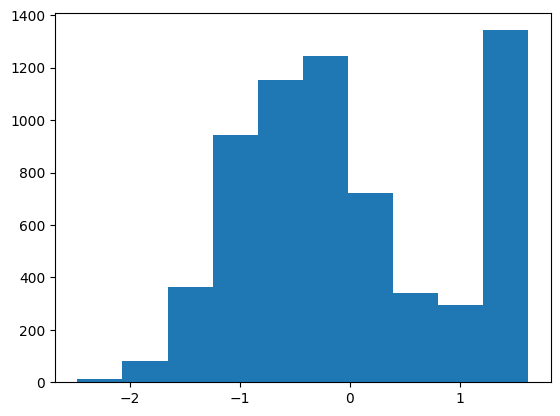

In [77]:
df['chlorides'] = StandardScaler().fit_transform(df[['chlorides']])
plt.hist(df['chlorides'])

(array([ 416.,  516.,  634.,  664.,  715.,  846.,  667.,  523.,  407.,
        1109.]),
 array([ 1. ,  6.2, 11.4, 16.6, 21.8, 27. , 32.2, 37.4, 42.6, 47.8, 53. ]),
 <BarContainer object of 10 artists>)

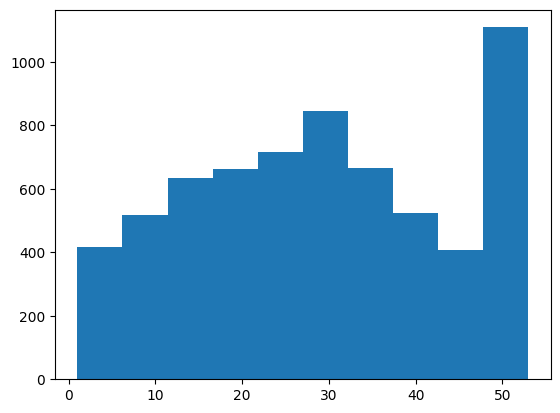

In [78]:
plt.hist(df['free sulfur dioxide'])

La distribución de free sulfure dioxide no es normal, así que la escalamos usando MinMaxScaler:

(array([ 416.,  516.,  634.,  664.,  843.,  718.,  667.,  523.,  407.,
        1109.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

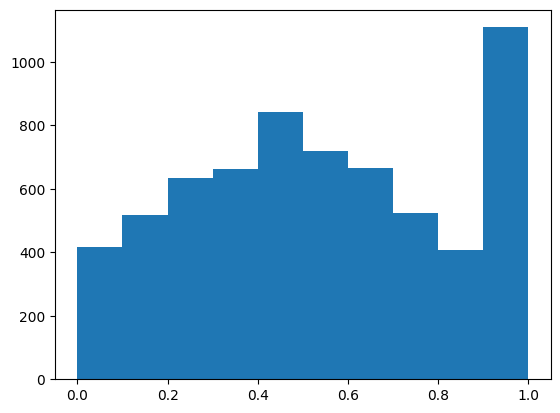

In [79]:
df['free sulfur dioxide'] = MinMaxScaler().fit_transform(df[['free sulfur dioxide']])
plt.hist(df['free sulfur dioxide'])

(array([492., 457., 351., 422., 673., 926., 867., 755., 593., 961.]),
 array([  6.  ,  24.95,  43.9 ,  62.85,  81.8 , 100.75, 119.7 , 138.65,
        157.6 , 176.55, 195.5 ]),
 <BarContainer object of 10 artists>)

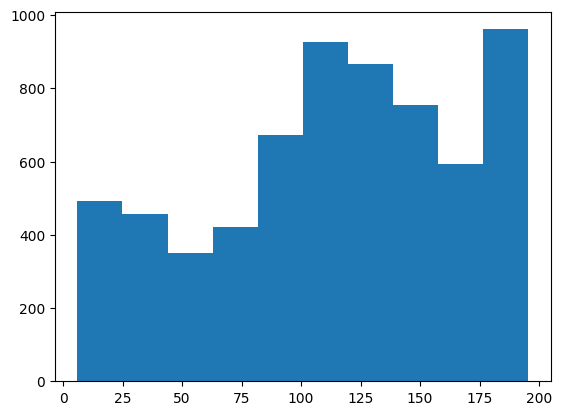

In [80]:
plt.hist(df['total sulfur dioxide'])

La distribución de total sulfur dioxide no es normal, así que la escalamos usando MinMaxScaler:

(array([492., 457., 351., 422., 673., 926., 867., 755., 593., 961.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

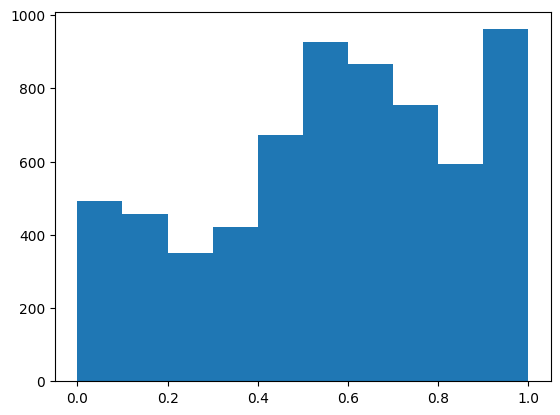

In [81]:
df['total sulfur dioxide'] = MinMaxScaler().fit_transform(df[['total sulfur dioxide']])
plt.hist(df['total sulfur dioxide'])

(array([ 20., 191., 485., 704., 822., 750., 909., 920., 851., 845.]),
 array([0.98711  , 0.9883305, 0.989551 , 0.9907715, 0.991992 , 0.9932125,
        0.994433 , 0.9956535, 0.996874 , 0.9980945, 0.999315 ]),
 <BarContainer object of 10 artists>)

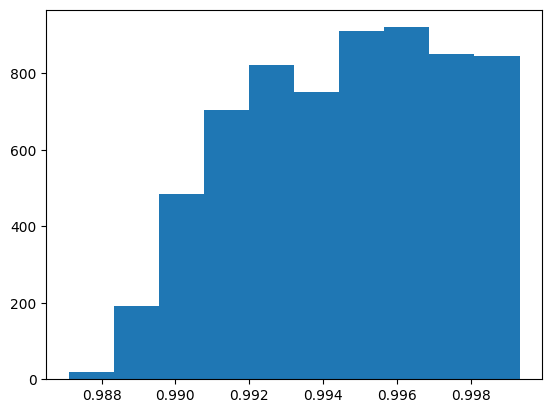

In [82]:
plt.hist(df['density'])

La distribución de density no es normal, así que la escalamos usando MinMaxScaler:

(array([ 20., 191., 485., 704., 822., 750., 909., 920., 851., 845.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

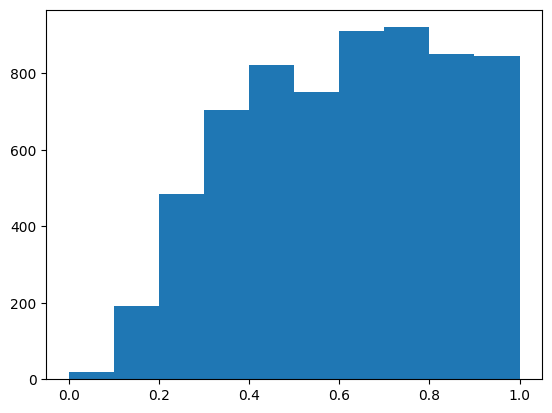

In [83]:
df['density'] = MinMaxScaler().fit_transform(df[['density']])
plt.hist(df['density'])

(array([  25.,  123.,  248.,  471.,  716., 1133.,  978.,  830.,  833.,
        1140.]),
 array([2.795, 2.858, 2.921, 2.984, 3.047, 3.11 , 3.173, 3.236, 3.299,
        3.362, 3.425]),
 <BarContainer object of 10 artists>)

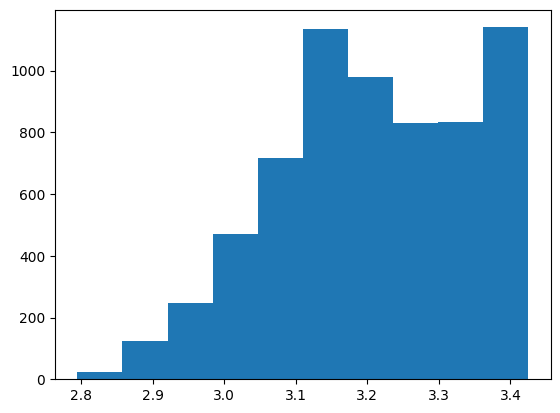

In [84]:
plt.hist(df['pH'])

La distribución de pH no es normal, así que la escalamos usando MinMaxScaler:

(array([  25.,  123.,  248.,  471.,  716., 1133.,  978.,  830.,  833.,
        1140.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

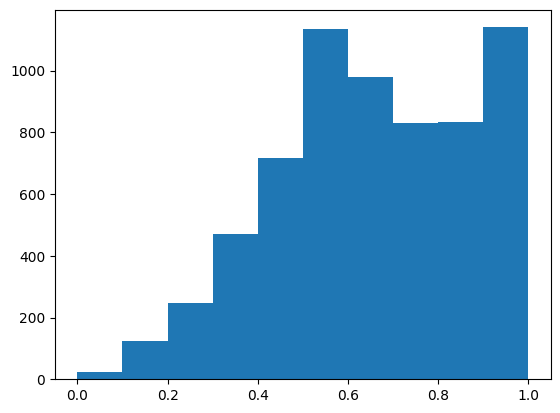

In [85]:
df['pH'] = MinMaxScaler().fit_transform(df[['pH']])
plt.hist(df['pH'])

(array([  10.,  108.,  283.,  794.,  916.,  839., 1066.,  773.,  472.,
        1236.]),
 array([0.22  , 0.2665, 0.313 , 0.3595, 0.406 , 0.4525, 0.499 , 0.5455,
        0.592 , 0.6385, 0.685 ]),
 <BarContainer object of 10 artists>)

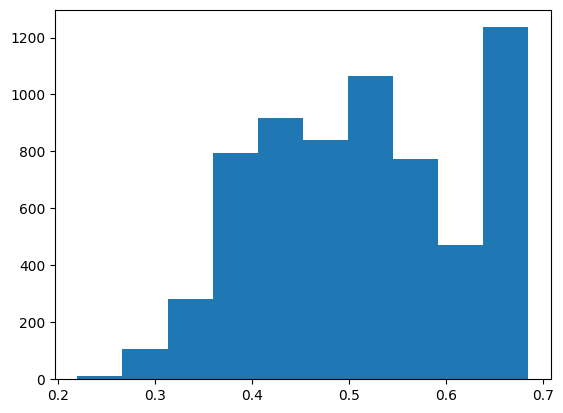

In [86]:
plt.hist(df['sulphates'])

La distribución de sulphates es aproximadamente normal, así que la escalamos usando StandardScaler:

(array([  10.,  108.,  283.,  794.,  916.,  839., 1066.,  773.,  472.,
        1236.]),
 array([-2.7094984 , -2.28234   , -1.8551816 , -1.4280232 , -1.00086479,
        -0.57370639, -0.14654799,  0.28061041,  0.70776881,  1.13492721,
         1.56208562]),
 <BarContainer object of 10 artists>)

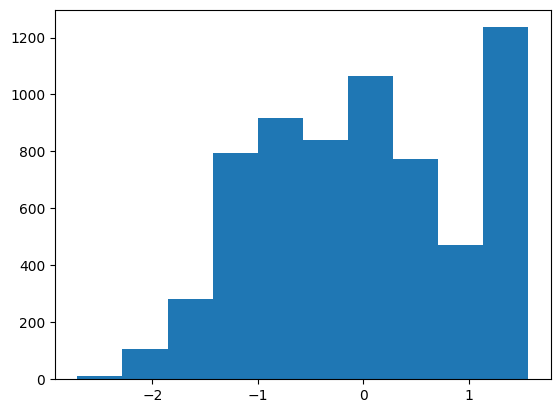

In [87]:
df['sulphates'] = StandardScaler().fit_transform(df[['sulphates']])
plt.hist(df['sulphates'])

(array([   7.,  222.,  751., 1088.,  928.,  722.,  589.,  621.,  427.,
        1142.]),
 array([ 8.  ,  8.42,  8.84,  9.26,  9.68, 10.1 , 10.52, 10.94, 11.36,
        11.78, 12.2 ]),
 <BarContainer object of 10 artists>)

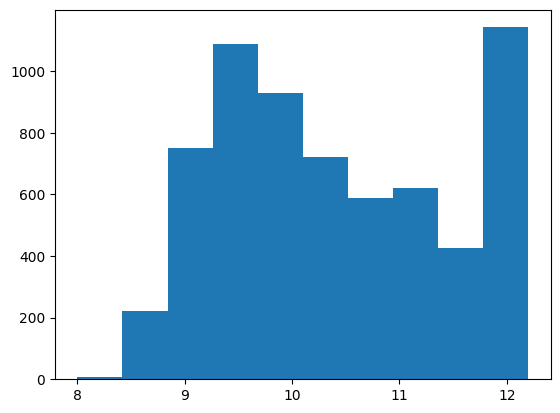

In [88]:
plt.hist(df['alcohol'])

La distribución de alcohol no es normal, así que la escalamos usando MinMaxScaler:

(array([   7.,  222.,  751., 1088.,  928.,  722.,  589.,  621.,  427.,
        1142.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

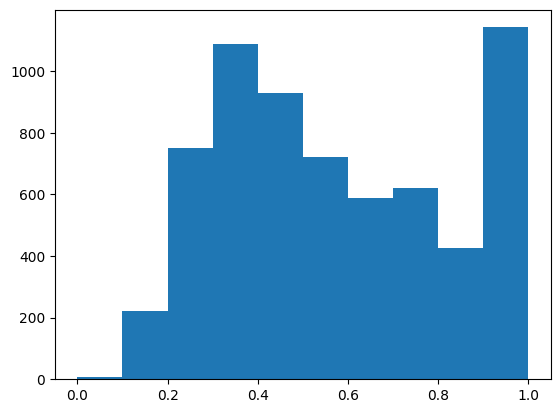

In [89]:
df['alcohol'] = MinMaxScaler().fit_transform(df[['alcohol']])
plt.hist(df['alcohol'])

Guardamos el dataset con los datos limpios:

In [90]:
df.to_csv("dataset_cleaned.csv")